## Info
carat: carat weight of the diamond

cut: describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal

color: D being the best and J the worst

clarity: how obvious inclusions are within the diamond (in order from best to worst, FL = flawless, I3= level 3 inclusions). FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

depth %: the height of a diamond, measured from the culet to the table, divided by its average girdle diameter

table %: the width of the diamond's table expressed as a percentage of its average diameter

price

X - length mm.
Y - width mm.
Z - depth mm.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Diamonds = pd.read_csv('dataset/diamonds.csv')
Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
Diamonds.shape

(53940, 11)

In [4]:
Diamonds.set_index('Unnamed: 0', inplace=True)
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
Diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
Diamonds['price'].mode()

0    605
dtype: int64

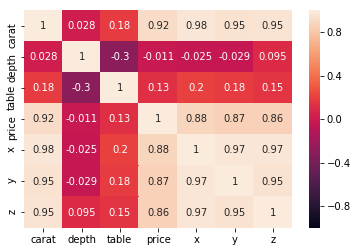

In [6]:
corr = Diamonds.corr()

sns.heatmap(corr, vmin=-1, annot=True)

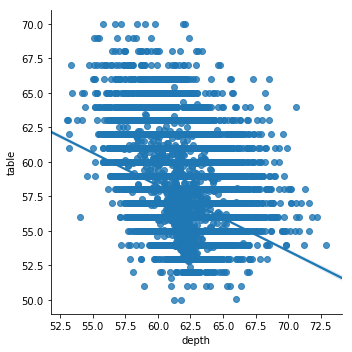

In [7]:
Diamonds_dt = Diamonds[(Diamonds['depth'] >=53) & (Diamonds['depth'] <=73) & 
                       (Diamonds['table'] >=50) & (Diamonds['table'] <=70)]
sns.lmplot(x='depth', y='table', data=Diamonds_dt)

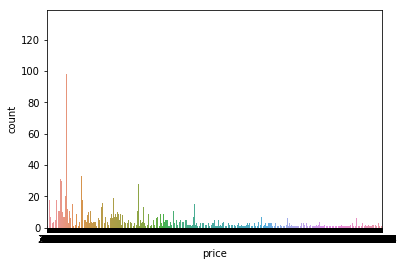

In [34]:
sns.countplot(x='price', data=Diamonds)

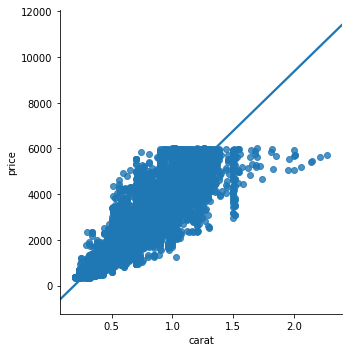

In [35]:
#Note on the price max: I initially tried capping it close to 3 sigma away from the average (~14,000),
#but the data that far out was not very helpful (I double checked in Excel, and there were not many points
#at that high a price; see the graph above. It doesn't have clear labels, but I was able to re-create it
#in Excel with actual readability. I determined the majority of the useful price data was under 6,000 for the price.
Diamonds_c1 = Diamonds[(Diamonds['carat'] <=3) &
                       (Diamonds['price']!=0) & (Diamonds['price']>0) &
                       (Diamonds['price'] <=6000)]
sns.lmplot(x='carat', y='price', data=Diamonds_c1)

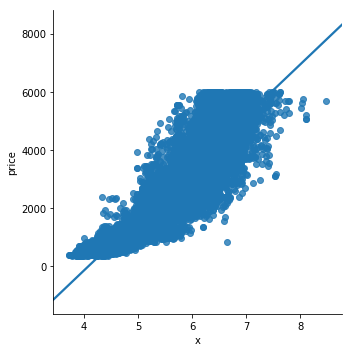

In [36]:
Diamonds_x = Diamonds[(Diamonds['x'] >=3) & (Diamonds['x'] <=9) &
                      (Diamonds['price']!=0) &
                      (Diamonds['price']>0) &
                      (Diamonds['price'] <=6000)]
sns.lmplot(x='x', y='price', data=Diamonds_x)

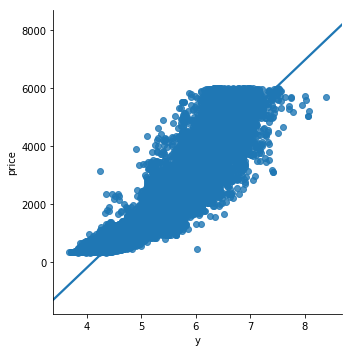

In [37]:
Diamonds_y = Diamonds[(Diamonds['y'] >=3) & (Diamonds['y'] <=9) & (Diamonds['price']!=0)  & (Diamonds['price'] <=6000)]
sns.lmplot(x='y', y='price', data=Diamonds_y)

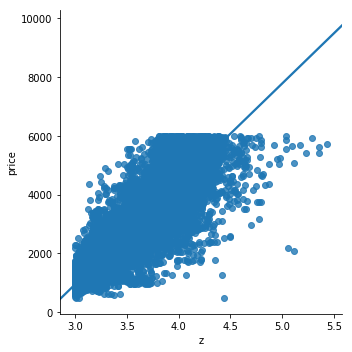

In [38]:
Diamonds_z = Diamonds[(Diamonds['z'] >=3) & (Diamonds['z'] <=6) &
                      (Diamonds['price']!=0)  &
                      (Diamonds['price']>0) &
                      (Diamonds['price'] <=6000)]
sns.lmplot(x='z', y='price', data=Diamonds_z)

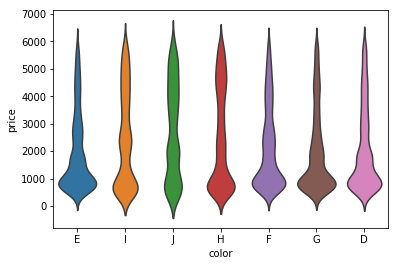

In [39]:
Diamonds_c2 = Diamonds[(Diamonds['price']!=0)  & 
                       (Diamonds['price']>0) &
                       (Diamonds['price'] <=6000)]
sns.violinplot(x='color', y='price', data=Diamonds_c2, inner=None)

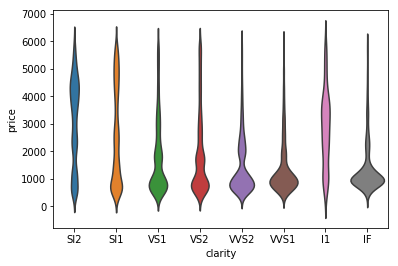

In [40]:
sns.violinplot (x='clarity', y='price', data=Diamonds_c2, inner=None)